# Simulation probabiliste en Python/Numpy : les fondamentaux

## Les librairies fondamentales, la fonction de tirage au sort

Les bibliothèques usuelles : fonctions mathématiques, vecteurs numpy, graphiques

In [1]:
import numpy as np
import matplotlib.pyplot as plt

La fonction de tirage au sort fondamentale

In [2]:
U = np.random.rand ##renommage np.random.rand en U

Attention `U` est un **nouveau nom** pour `np.random.rand`,
Ce n'est pas le résultat d'un appel `np.random.rand()` !!
 Un appel à `U()` équivaut à un appel à `np.random.rand()` et retourne un nombre aléatoire uniformément réparti sur $[0,1]$
 
C'est une valeur simulée d'une v.a --à densité-- uniformément distribuée sur $[0,1]$
$$
 E(U) = \frac12,\, V(U) = \frac1{12}.
 $$
Faire **UN** appel à `U()` c'est comme tourner une fois la roue de la fortune (cf dessin tableau)
 Faire **plusieurs appels**  à `U()` c'est comme tourner plusieurs fois cette roue, et de faire des tirages indépendants les uns des autres

![Roue de la fortune](roue_fortune.jpg)![Roue de la fortune](roue_fortune.jpg)![Roue de la fortune](roue_fortune.jpg)
 

In [5]:
print("Premier tirage",U())

Premier tirage 0.43722766969842475


In [6]:
print("Deuxième  tirage",U())

Deuxième  tirage 0.3674903805760845


## Recommencer une même expérience, statistiques

Pour comprendre le hasard, on a intérêt à tirer de multiples fois (recommencer `NS` fois la même expérience)

`NS`, le nombre simulations est "assez grand" `NS = 10_000`

 On peut placer (pour les conserver) les résultats du tirage dans une liste
 ou un tableau `numpy` (ce qui permet d'accéder à des caractéristiques statistiques facilement)

In [16]:
NS = 1_000_000
Sim_U = np.array([U() for _ in range(NS)]) # _ : nom de variable légal, utilisé si on ne se sert vraiment pas du compteur de boucle


In [8]:
Sim_U

array([0.3976949 , 0.00556173, 0.21432705, ..., 0.91899195, 0.74874348,
       0.72289373])

On peut calculer la moyenne et l'écart-type de cette liste de nombres

In [17]:
m = Sim_U.mean()
sigma = Sim_U.std()

In [18]:
m, 12*sigma**2

(0.5003264730079808, 1.0008535537814223)

Question: De quels valeurs théoriques "exactes" les deux valeurs m et sigma sont-elles proches ?


Réponse : 

On peut faire un histogramme, mais pour les v.a. uniformes ce n'est pas très passionnant

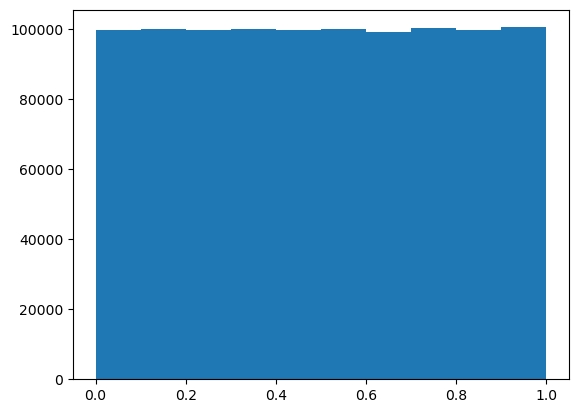

In [19]:
plt.subplots()
plt.hist(Sim_U) 
plt.show()


L'histogramme de U**2 est intéressant, il montre qu'en faisant cette transformation sur le nombre tiré initialement, on a plutôt tendance à tirer de petits nombres 

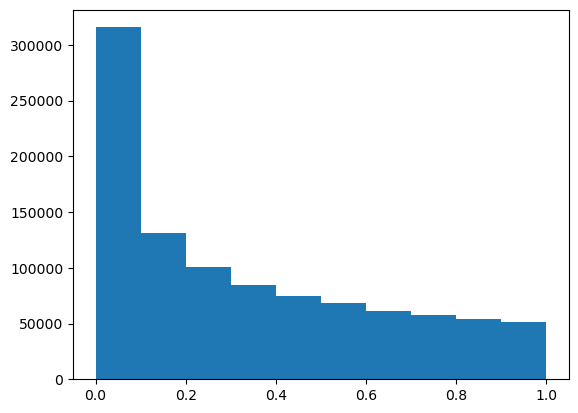

In [20]:
Sim_U2 = Sim_U**2 #le tableau des carrés des éléments de Sim_U
plt.subplots()
plt.hist(Sim_U2) 
plt.show()


Améliorer ce graphique

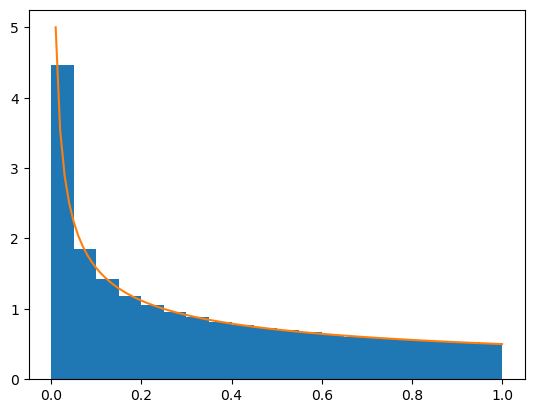

In [22]:
plt.subplots()
plt.hist(Sim_U2, density= True, bins = 20) 
x = np.linspace(0.01,1,100)
plt.plot(x,1/2/np.sqrt(x))
plt.show()


Question : signification des paramètres additionnels de `plt.hist`

Réponse : density = True pour tracer les % ds chaque classe sous forme d'aire, bins = spécification des classes pour le tracé de l'histogramme

# A vous de travailler !

## Dé à 6 faces

Comment, à partir de notre roue de la fortune simuler un dé à 6 faces ?

- Ecrire la fonction simulatrice, `De()`
- simuler un grand nombre de fois,
- évaluer moyenne (et écart-type) pour vérfiier la cohérence), 
- tracer l'histogramme des valeurs simulées
- Améliorer la fonction (revenir à la case de définition) pour pouvoir tirer un dé à `n` faces (avec `n = 6` par défaut)

In [29]:
def De(n = 6) : 
    u = U()
    return np.ceil(u*n)

In [25]:
NS = 10_000
Sim_De = np.array([De() for _ in range(NS)])

In [30]:
NS = 10_000
Sim_De = np.array([De(n = 18) for _ in range(NS)])

In [31]:
Sim_De.mean(), Sim_De.std()**2

(9.4773, 26.890884710000005)

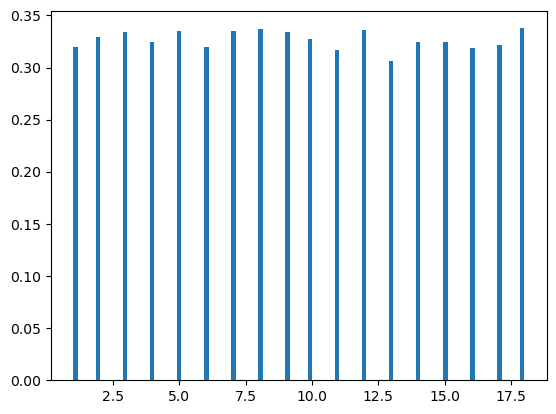

In [34]:
plt.subplots()
plt.hist(Sim_De, density= True, bins = 100) 
plt.show()


## Pile ou face a.k.a **Bernoulli**

Comment, à partir de notre roue de la fortune simuler une pièce biaisée:

Pile (= valeur 1) avec proba $p$, Face (= valeur 0) avec proba $q = 1-p$ ?

Mêmes consignes que précédemment. Fonction simulatrice nommée `Bernoulli`

In [35]:
def Bernoulli(p):
    u = U()
    if u <= p :
        return 1
    return 0

def Bernoulli(p):
    return int(U()<=p)

0.3032 0.21126976000000003


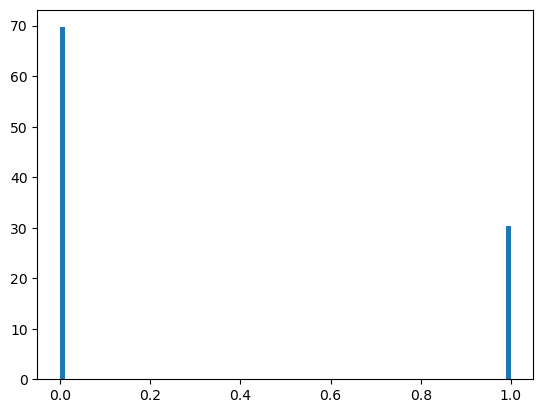

In [37]:
NS = 10_000
Sim_Ber = np.array([Bernoulli( p = 0.3) for _ in range(NS)])
print(Sim_Ber.mean(), Sim_Ber.std()**2)
plt.subplots()
plt.hist(Sim_Ber, density= True, bins = 100) 
plt.show()


## Somme de deux dés indépendants

Simuler l'expérience de tirer deux dés indépendants et de faire la somme `S` des résultats obtenus

Mêmes consignes que précédemment pour la v.a. `S`

Modifier la fonction `S` pour pouvoir spécifier  `n` le nombre de faces des dés (`n = 6` par défaut), `k` le nombre de dés à tirer (`k = 2` par défaut)

In [40]:
def S(n = 6, k = 2) :
    s = 0
    for _ in range(k) :
        s += De(n = n)
    return s

255.491 211.97491900000003


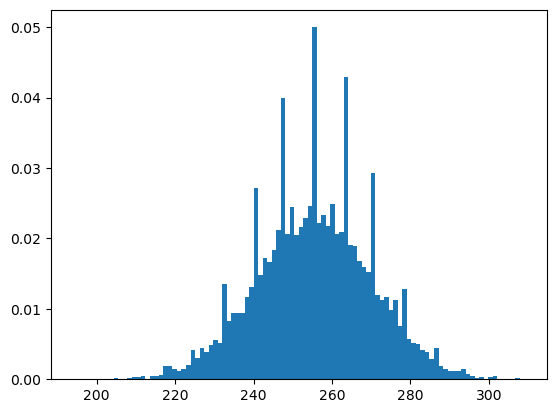

In [41]:
NS = 10_000
Sim_S = np.array([S(n=6, k = 73) for _ in range(NS)])
print(Sim_S.mean(), Sim_S.std()**2)
plt.subplots()
plt.hist(Sim_S, density= True, bins = 100) 
plt.show()


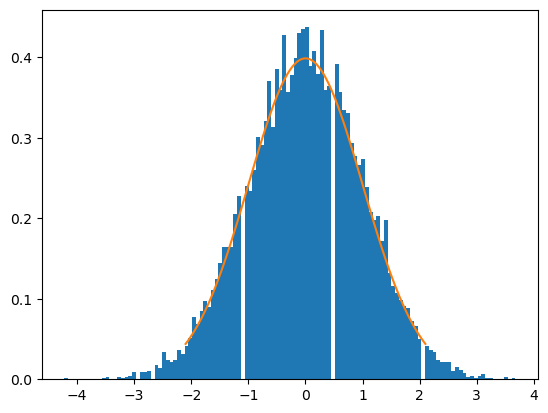

In [51]:
m = Sim_S.mean() ; sigma =  Sim_S.std()

Sim_S_CR = (Sim_S - m)/sigma

plt.subplots()
plt.hist(Sim_S_CR, density= True, bins = 120 ) 
x = np.linspace(-2.1,+2.1, 100)
plt.plot(x, np.exp(-0.5*x**2)/np.sqrt(2*np.pi))
plt.show()

## Simulation de binomiale

On tire `n` fois (indépendamment) un pièce biaisée de paramètre `p` et on compte le nombre `X` de piles apparus dans cette série de tirages

- Quelle est théoriquement la loi de `X`, son espérance, sa variance
- Ecrire une fonction simulatrice `X(n = 2, p = 0.5)` 
- Même consignes que précédemment (on prendra par exemple `n = 30, p=0.33`)

In [52]:
def Binomiale( n = 2, p = 0.5) :
    s = 0
    for _ in range(n) :
        s += Bernoulli(p)
    return s

In [53]:
NS = 10_000
Sim_Bin = np.array([Binomiale(n=30, p = 0.33) for _ in range(NS)])

9.8195 6.606719749999999


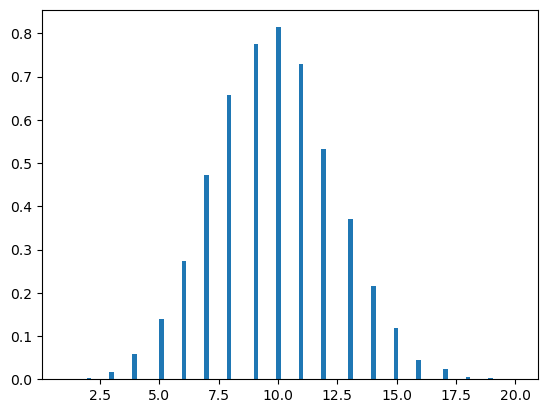

In [55]:
print(Sim_Bin.mean(), Sim_Bin.std()**2)
plt.subplots()
plt.hist(Sim_Bin, density= True, bins = 100) 
plt.show()

## Vers la loi normale

- Centrer et réduire `Sim_X` (de la partie précédente) pour obtenir un échantillon de moyenne nulle, de variance 1 et tracer l'histogramme
- recommencer pour différentes (4 ou 5) valeurs de n (de plus en plus grandes) et tracer les histogrammes les uns sur les autres que se passe-t-il ?

# Simuler des expériences

## Les allumettes

**Scénario** Un fumeur a dans chacune de ses deux poches une boite d’allumettes qui contient initialement $M$ allumettes pour la première et $N$ allumettes pour la deuxième. 

A chaque fois qu’il veut allumer une cigarette, il choisit au hasard une de ses deux poches et prend une allumette dans la boite qui s’y trouve. 

Si la boite est vide, il observe le nombre $S$ d’allumettes restant dans l’autre boite. Si l’autre boite est vide (i.e si $S=0$, sa journée est gâchée.

**Question** Ecrire un script pour évaluer numériquement, en fonction de M et N, la probabilité que la journée soit gâchée.


## L'ascenseur fou

**Scénario** Un ascenseur digne d'un film d'horreur néerlandais a le comportement suivant:
   Dans un immeuble de N étages (Rez de chaussée compris), 
   - quand on est à un étage différent du rez de chaussée (RdC) :
      * avec probabilité 1/2, on descend d'un étage à l'étape d'après 
      * avec probabilité 1/2, on est envoyé au RdC 
   - quand on est au RdC, l'appui sur le bouton vous envoie dans l'un quelconque des étages supérieurs

**Questions** 
- En faisant un grand nombre d'expériences, à quel étage se retrouve-t-on le plus de chances ?
- Combien de fois appuyer sur le bouton pour aller au premier étage ?